In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import scipy.interpolate
import scipy.stats
import scipy.optimize
from datetime import datetime

import uproot

from ipywidgets import IntProgress
from IPython.display import display

import multigauss as mg
import pylandau

matplotlib.rcParams['figure.figsize'] = [12,8]
matplotlib.rcParams['axes.labelsize'] = 'x-large'


In [2]:
df54 = pd.read_pickle('/mnt/c/Users/oh6/Downloads/JANUS/bin/DataFiles/dt5202/TileTesting/20230804_Hamamatsu_S13_4stack_54V/Run50_list.pkl')
df55 = pd.read_pickle('/mnt/c/Users/oh6/Downloads/JANUS/bin/DataFiles/dt5202/TileTesting/20230808_Hamamatsu_S13_4stack_55V/Run51_list.pkl')
df56 = pd.read_pickle('/mnt/c/Users/oh6/Downloads/JANUS/bin/DataFiles/dt5202/TileTesting/20230731_Hamamatsu_S13_4stack_56V/Run1_list.pkl')


(array([[0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 2., ..., 0., 0., 1.],
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([3.69449443e+06, 1.70398086e+09, 3.40426723e+09, 5.10455360e+09,
        6.80483997e+09, 8.50512634e+09, 1.02054127e+10, 1.19056991e+10,
        1.36059854e+10, 1.53062718e+10, 1.70065582e+10, 1.87068445e+10,
        2.04071309e+10, 2.21074173e+10, 2.38077037e+10, 2.55079900e+10,
        2.72082764e+10, 2.89085628e+10, 3.06088491e+10, 3.23091355e+10,
        3.40094219e+10, 3.57097082e+10, 3.74099946e+10, 3.91102810e+10,
        4.08105673e+10, 4.25108537e+10, 4.42111401e+10, 4.59114264e+10,
        4.76117128e+10, 4.93119992e+10, 5.10122856e+10, 5.27125719e+10,
        5.44128583e+10, 5.61131447e+10, 5.78134310e+10, 5.95137174e+10,
        6.12140038e+10, 6.29142901e+10, 6.46145765e+10, 6.63148629e+10,
        6.80151492e+10, 6.97154

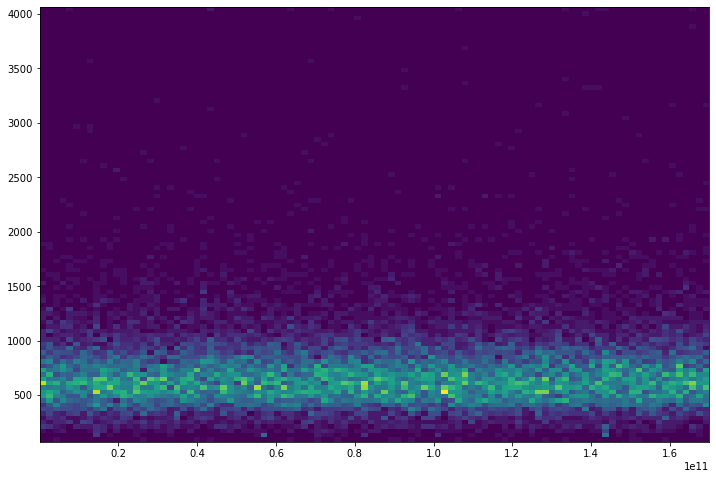

In [15]:
dft = df56.loc[df56.channel == 32]
plt.hist2d(dft.t_stamp, dft.HG, bins = 100)
#plt.yscale('log')

/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[ 7.50342403e+05  0.00000000e+00  5.00000000e+00  4.41668620e+01
 -2.69482427e-03  4.18441292e+00  1.21331882e+01  7.74087983e-02
  7.50295106e+05]


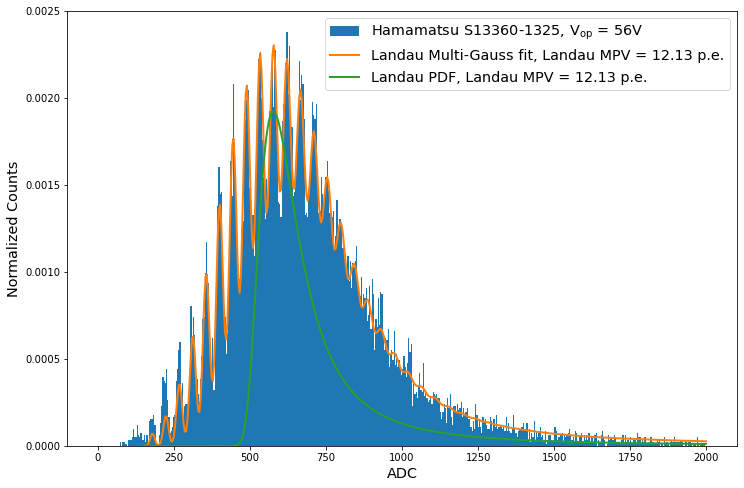

In [45]:
 content, bins, _  = plt.hist(dft.HG, bins = 500, range = (0, 2000), density = True, label = 'Hamamatsu S13360-1325, V${}_\mathrm{op}$ = 56V')
 centers = (bins[:-1] + bins[1:])/2
 
#plt.plot(centers, mg.sps_landau_poisson(centers, ped_x = 50, ped_a = 0.00, gain = 45, width_base = 4, width_scale = 4, landau_mpv=12, landau_sigma= 0.08, ped_offset = 15, output_single_peaks = False))

mask = (centers > 150)

r, c = scipy.optimize.curve_fit(mg.sps_landau_poisson, centers[mask], content[mask], p0=(50, 0.000, 5, 45, 4, 4, 12, 0.08, 15))

plt.plot(centers[mask], mg.sps_landau_poisson(centers, *r)[mask], lw = 2, label=f'Landau Multi-Gauss fit, Landau MPV = {r[6]:.2f} p.e.', color = 'C1')

landau_mpv = r[6]
landau_sigma = r[7]

landau = pylandau.landau_pdf((centers-50)/r[3] , landau_mpv, landau_sigma*landau_mpv)
plt.plot(centers[mask], landau[mask]/44, lw = 2, label=f'Landau PDF, Landau MPV = {r[6]:.2f} p.e.', color = 'C2')



plt.ylabel('Normalized Counts')
plt.xlabel('ADC')

plt.legend(fontsize='x-large')


print(r)


 

[5.18380045e+01 1.79792718e-02 6.30811668e+00 3.53030092e+01
 9.59585920e-01 2.00806308e+01 2.08093365e+01 6.52978369e-08
 8.31606785e+01]


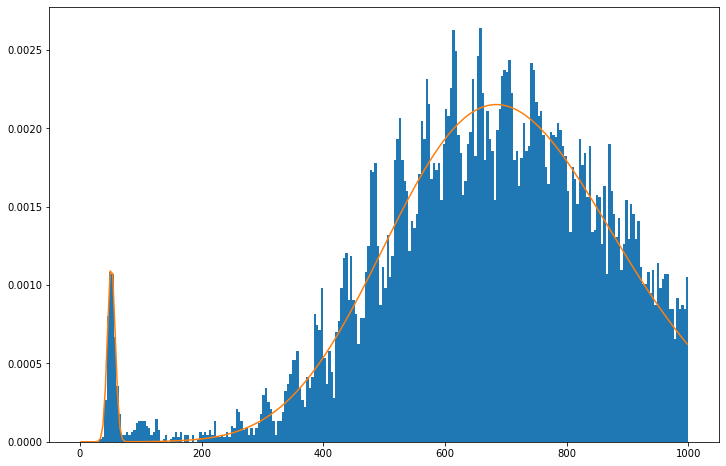

In [99]:
content, bins, _ = plt.hist(df[(df.channel == 36) & (df.t_stamp < 2.5E11)].HG, bins = 250, range = (0,1000), density  = True)
centers = (bins[:-1] + bins[1:])/2

#plt.plot(centers, mg.sps_poisson(centers, ped = 50, gain = 28, width_base = 5, width_scale = 2, poisson_k = 10, ped_offset = 0, output_single_peaks = False))
#plt.plot(centers, mg.sps_landau_poisson(centers, ped = 50, gain = 28.2, width_base = 6, width_scale = 2, landau_mpv=10, landau_sigma= 0.08, ped_offset = 15, output_single_peaks = False))

mask = (centers > 0) & (centers < 1000)
r, c = scipy.optimize.curve_fit(mg.sps_landau_poisson, centers[mask], content[mask], p0=(50, 0.001, 5, 28.2, 6, 2, 10, 0.08, 15))

plt.plot(centers[mask], mg.sps_landau_poisson(centers, *r)[mask], label=f'Landau-Gauss fit, MPV = {r[0]:.2f} p.e.', color = 'C1')
#plt.plot(centers, mg.sps_landau_poisson(centers, *r), label=f'Landau-Gauss fit, MPV = {r[0]:.2f} p.e.', color = 'C1', ls = '--')


print(r)
# # r33, c33 = scipy.optimize.curve_fit(pylandau.langau, bins33c[mask33], con33[mask33], p0=(62, 8, 5, 0.008))
# print(r33)
# plt.plot(x33, pylandau.langau(x33,*r33), lw = 3, ls = '--', label=f'Landau-Gauss fit, MPV = {r33[0]:.2f} p.e.')


[5.21266581e+01 1.47859366e-02 6.38321639e+00 4.34910392e+01
 5.36202187e+00 3.85878524e+00 1.40523553e+01 7.86216483e-02
 5.32020522e+00]


(1e-06, 0.01)

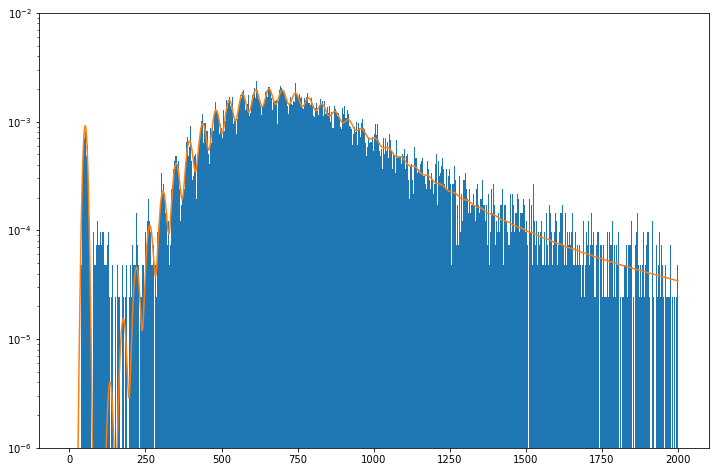

In [120]:
content, bins, _ = plt.hist(df[(df.channel == 36)].HG, bins = 1000, range = (0,2000), density  = True)
centers = (bins[:-1] + bins[1:])/2

#plt.plot(centers, mg.sps_poisson(centers, ped = 50, gain = 28, width_base = 5, width_scale = 2, poisson_k = 10, ped_offset = 0, output_single_peaks = False))
#plt.plot(centers, mg.sps_landau_poisson(centers, ped_x = 50, ped_a = 0.01, ped_w = 5, gain = 45, width_base = 8, width_scale = 2, landau_mpv=15, landau_sigma= 0.08, ped_offset = 15, output_single_peaks = False))

mask = (centers > 0) & (centers < 2000)
r, c = scipy.optimize.curve_fit(mg.sps_landau_poisson, centers[mask], content[mask], p0=(50, 0.01, 5, 45, 5, 2, 15, 0.08, 15),)

plt.plot(centers[mask], mg.sps_landau_poisson(centers, *r)[mask], label=f'Landau-Gauss fit, MPV = {r[0]:.2f} p.e.', color = 'C1')
#plt.plot(centers, mg.sps_landau_poisson(centers, *r), label=f'Landau-Gauss fit, MPV = {r[0]:.2f} p.e.', color = 'C1', ls = '--')


print(r)
# # r33, c33 = scipy.optimize.curve_fit(pylandau.langau, bins33c[mask33], con33[mask33], p0=(62, 8, 5, 0.008))
# print(r33)
# plt.plot(x33, pylandau.langau(x33,*r33), lw = 3, ls = '--', label=f'Landau-Gauss fit, MPV = {r33[0]:.2f} p.e.')

plt.yscale('log')
plt.ylim(1E-6, 1E-2)

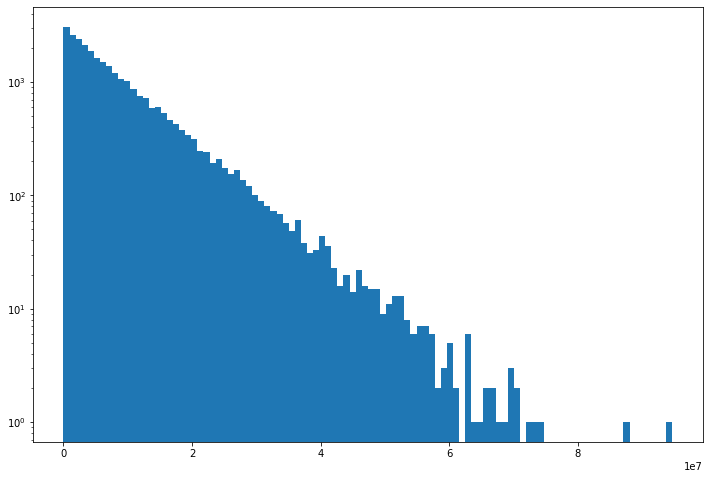

In [36]:
plt.hist(np.diff(df[(df.channel == 36) &(df.t_stamp < 2.5E11)].t_stamp), bins = 100)
plt.yscale('log')

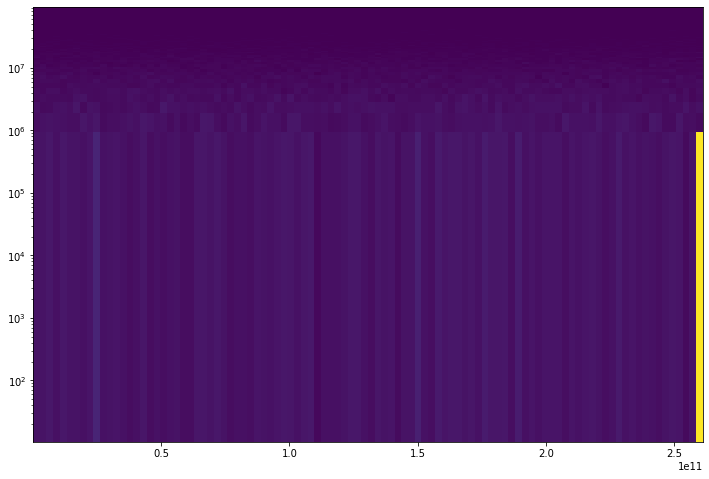

In [26]:
plt.hist2d(df[df.channel == 36].t_stamp[:-1], np.diff(df[df.channel == 36].t_stamp), bins = 100)
plt.yscale('log')

In [ ]:

def fitfunc(x, ped, gain, poisson_k):
    return sps(x, ped, gain, poisson_k, 8, 10)

r, cov = scipy.optimize.curve_fit(sps, centers, content, p0 = [70, 32, 8, 8, 4.5])
#r, cov = scipy.optimize.curve_fit(fitfunc, centers, content, p0 = [75, 42, 2.3])

multigauss, peaks =  sps(x, *r, output_single_peaks=True)

plt.plot(x, multigauss, color='C1')
for peak in peaks:
    plt.plot(x, peak, '--', color = 'C1')
plt.plot(x, sps(x, *r))

plt.figure()


content, bins, _ = plt.hist(df[df.channel == 40].HG, bins = 500, range = (0,500), density  = True, label = "S14160-1315, V${}_{\mathrm{op}}$=45V")


r2, cov2 = scipy.optimize.curve_fit(sps_freeamp_fit, centers, content, p0 = [*r[:-1], 0, *poisson_ampls(r[-1])])


multigauss, peaks =  sps_freeamp(x, *r2, output_single_peaks=True)

plt.plot(x, multigauss, color='C1', label = f'Multi-Gauss Fit, gain = {r2[1]:.2f} ADC/p.e.', lw = 3)
for peak in peaks:
    plt.plot(x, peak, '--', color = 'C1')
#plt.plot(x, sps_freeamp(x, *r[:-1], 1, 2, 3, 4))

print(r2)

#plt.legend()

plt.xlim(0, 500)
plt.ylim(0, 0.007)

plt.xlabel('Signal Amplitude in ADC')
plt.ylabel('Normalized Counts')

plt.legend(fontsize = 'x-large')

plt.savefig('sps_fit.pdf')


[1.41696584e-01 2.76884653e-01 2.70525615e-01 1.76208414e-01
 8.60807720e-02 3.36415233e-02 1.09562997e-02 3.05847805e-03
 7.47058970e-04 1.62200384e-04]
[6.39658286e+01 2.68110655e+01 9.74478172e+00 7.87117026e+00
 5.13687008e-02 1.80381048e-01 2.42064332e-01 2.64547477e-01
 1.87036600e-01 8.52886377e-02 2.81303476e-02 1.04618139e-02
 1.72330098e-03 1.12164572e-03 2.23231325e-05]


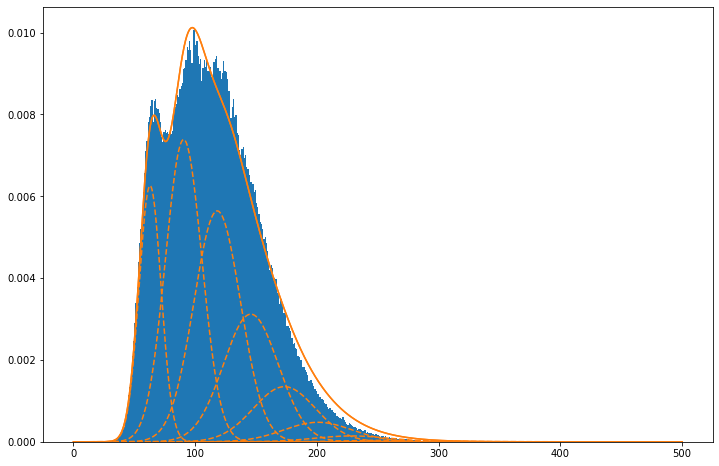

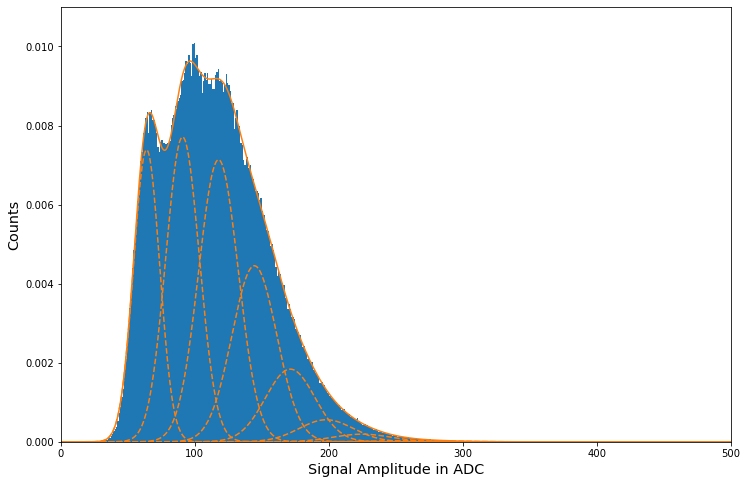

In [181]:
df = pd.read_pickle('/mnt/c/Users/oh6/Downloads/JANUS/bin/DataFiles/dt5202/SinglePhotonSpectra/Hamamatsu/S14160-3015_4/45V/Run142_list.pkl')

content, bins, _ = plt.hist(df[df.channel == 32].HG, bins = 500, range = (0,500), density  = True)
centers = (bins[:-1] + bins[1:])/2

def fitfunc(x, ped, gain, poisson_k):
    return sps(x, ped, gain, poisson_k, 8, 10)

r, cov = scipy.optimize.curve_fit(sps, centers, content, p0 = [70, 35, 8, 10, 2.9])
#r, cov = scipy.optimize.curve_fit(fitfunc, centers, content, p0 = [75, 42, 2.3])

multigauss, peaks =  sps(x, *r, output_single_peaks=True)

plt.plot(x, multigauss, color='C1')
for peak in peaks:
    plt.plot(x, peak, '--', color = 'C1')
plt.plot(x, sps(x, *r))


plt.figure()


content, bins, _ = plt.hist(df[df.channel == 32].HG, bins = 500, range = (0,500), density  = True)


r2, cov2 = scipy.optimize.curve_fit(sps_freeamp_fit, centers, content, p0 = [*r[:-1], 0, *poisson_ampls(r[-1])])


multigauss, peaks =  sps_freeamp(x, *r2, output_single_peaks=True)

plt.plot(x, multigauss, color='C1', label = 'Multi-Gauss Fit')
for peak in peaks:
    plt.plot(x, peak, '--', color = 'C1')
#plt.plot(x, sps_freeamp(x, *r[:-1], 1, 2, 3, 4))

print(r2)

#plt.legend()

plt.xlim(0, 500)
plt.ylim(0, 0.011)

plt.xlabel('Signal Amplitude in ADC')
plt.ylabel('Counts')

plt.savefig('sps_fit.pdf')


In [1]:
def gauss(x, mu, sigma):
    return 1/(sigma * np.sqrt(2*np.pi)) * np.exp(-(x-mu)**2/(2*sigma**2))

def multigauss(x, *params):
    if len(params) % 3 != 0:
        raise ValueError("Wrong number of parameters!")
    
    amps = np.array(params[0::3])[:, np.newaxis]
    mus = np.array(params[1::3])[:, np.newaxis]
    sigmas = np.array(params[2::3])[:, np.newaxis]


    y = amps * gauss(x, mus, sigmas)

    return y.sum(axis=0), y


def sps(x, ped = 50, gain = 50, width_base = 5, width_scale = 5, poisson_k = 5, output_single_peaks = False):
    n_peaks = int(3*poisson_k)+5

    amps = scipy.stats.poisson.pmf(np.arange(0, n_peaks, 1), poisson_k)
    mus  = ped + gain * np.arange(0, n_peaks, 1)
    sigmas = np.sqrt(width_base**2 +  width_scale**2 * np.arange(0, n_peaks, 1))

    params = np.empty((n_peaks*3,), dtype=amps.dtype)
    params[0::3] = amps
    params[1::3] = mus
    params[2::3] = sigmas

    if output_single_peaks:
        return multigauss(x, *params)
    else:
        return multigauss(x, *params)[0]

x = np.linspace(-5, 500, 1000)

mg, gs = sps(x, output_single_peaks=True)

plt.plot(x, mg, 'k', label='multigauss', lw = 3)
for g in gs:
    plt.plot(x, g, 'r--', label='gauss')

NameError: name 'np' is not defined

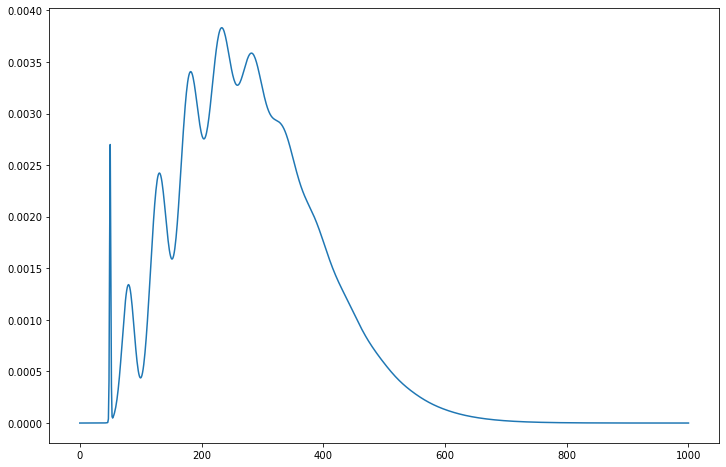

In [32]:
xx = np.linspace(0, 1000, 1000)

plt.plot(xx, mg.sps_poisson(xx, ped = 50, gain = 50, width_base = 1, width_scale = 10, poisson_k = 5, ped_offset = 20, output_single_peaks = False))

105
105
105


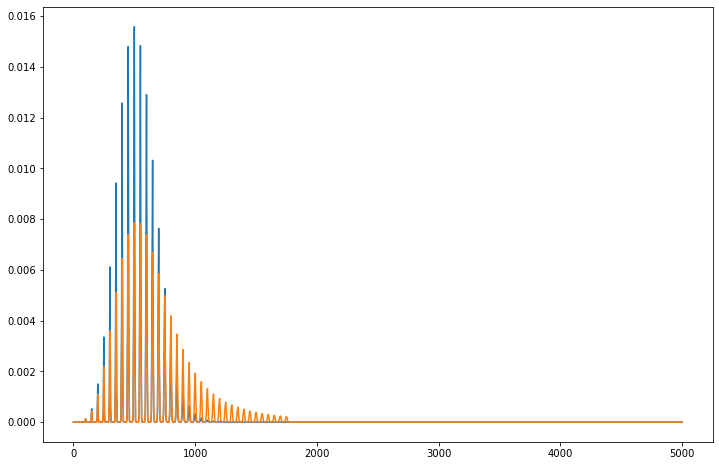

In [44]:
xx = np.linspace(0, 5000, 1000)
plt.plot(xx, mg.sps_poisson(xx, ped = 50, gain = 50, width_base = 1, width_scale = 1, poisson_k = 10, ped_offset = 0, output_single_peaks = False))
plt.plot(xx, mg.sps_landau_poisson(xx, ped = 50, gain = 50, width_base = 2, width_scale = 1, landau_mpv = 10, landau_sigma = 0.15, ped_offset = 0, output_single_peaks = False))